(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   gender                    299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
   

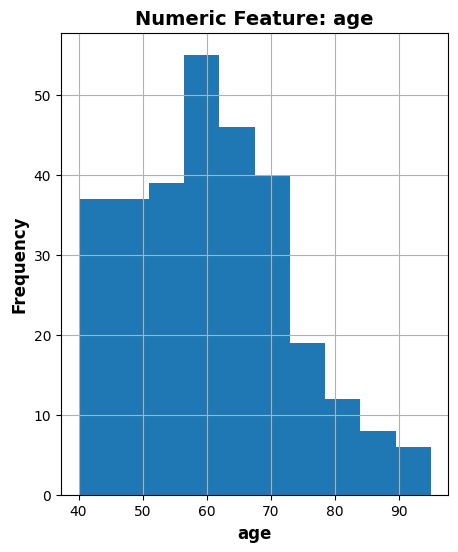

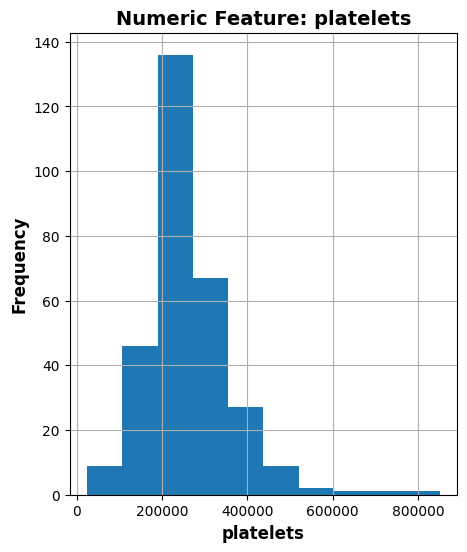

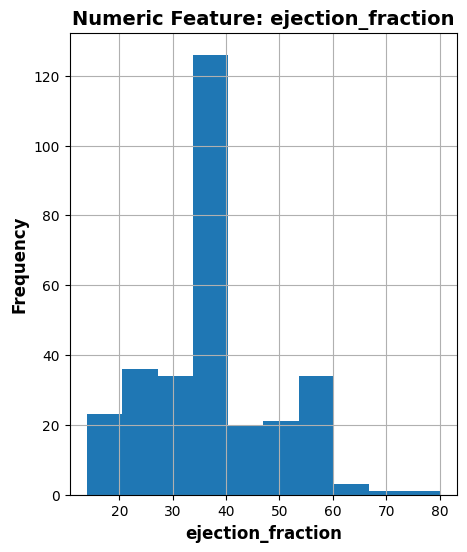

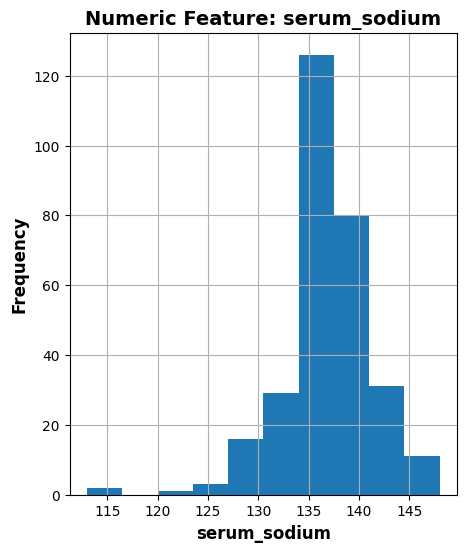

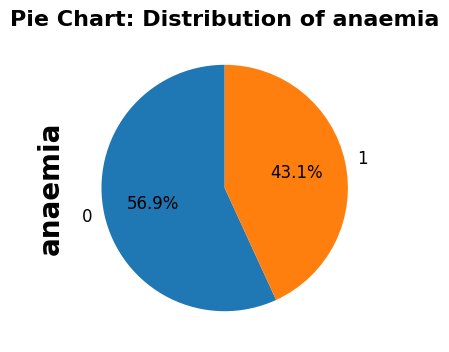

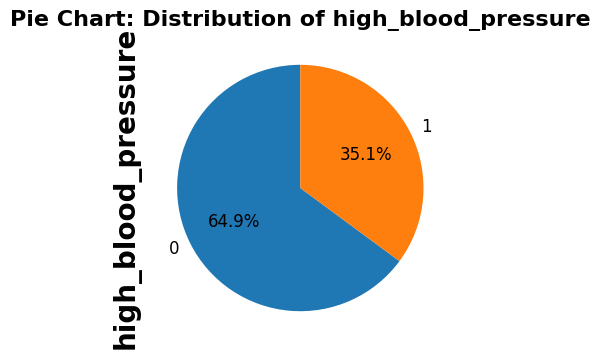

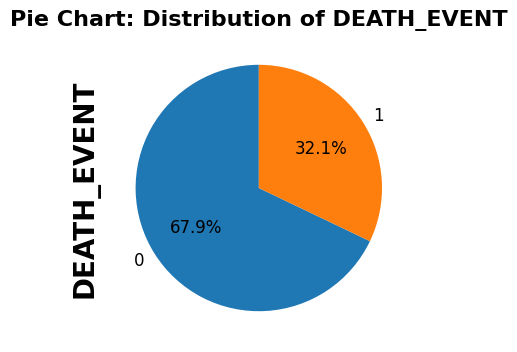

high_blood_pressure
1    194
0    194
Name: count, dtype: int64


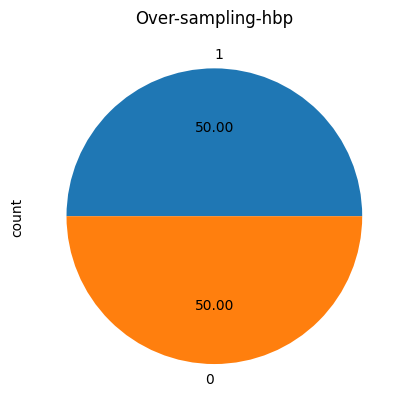

DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


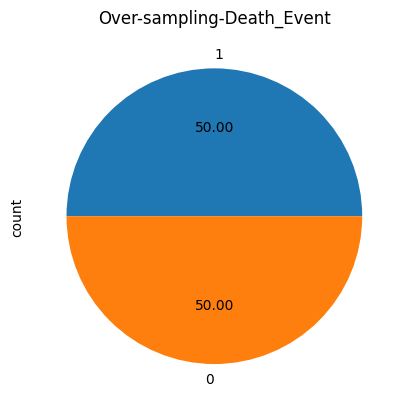

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

class HealthDataset:
    def __init__(self, csv_file_path):
        self.csv_file_path=csv_file_path
        self.data_input=None
        #self.data_input= pd.read_csv(csv_file_path)
    def EDA_Processing(self):
        # Read the CSV file 
        self.data_input = pd.read_csv(self.csv_file_path)
    
        print(self.data_input.shape)  
        print(self.data_input.info()) 
        print(self.data_input.describe())
        print(self.data_input.var())
        print(self.data_input.kurt())
        print(self.data_input.skew())
        #Data Cleaning and Preprocessing

        # 1: Handling Missing Values
        data_miss_value=self.data_input.isnull().sum()
        print ('Null detection from the dataset')
        print(self.data_input.isnull().sum())

        data_series_without_zeros = data_miss_value.drop(data_miss_value[data_miss_value == 0].index)
        values_index = data_series_without_zeros.index
        print(' After Null processing')
        #  Removing rows with missing values 
        self.data_input.dropna(inplace=True)
        print(self.data_input.isnull().sum())

        # Imputing missing values 
        for tt in range(len(data_series_without_zeros)):

            mean_value = self.data_input[(values_index[tt])].mean()
            self.data_input[values_index[tt]].fillna(mean_value, inplace=True)
    
        # 2. Handling Duplicates

        # Check for  duplication
        self.data_input.drop_duplicates(inplace=True)
        print (' Size of the raw dataset after duplicate removal.')
        print(self.data_input.shape)  
        print(self.data_input.describe())
       
    def clean_data(self):

        # Removing unimportant features
        self.data_input = self.data_input.drop('time', axis=1)


    def explore_numeric_features(self, selected_columns):
        for column in selected_columns:
            plt.figure()
            ax = self.data_input[column].hist(bins=10, figsize=(5, 6))
            plt.title(f'Numeric Feature: {column}', fontweight='bold', fontsize=14)
            plt.xlabel(column, fontweight='bold', fontsize=12)
            plt.ylabel('Frequency', fontweight='bold', fontsize=12)
            plt.show()

    def explore_categorical_feature(self, category_column):
        plt.figure(figsize=(5, 4))
        ax = self.data_input[category_column].value_counts().plot.pie(
            autopct='%1.1f%%', startangle=90, fontsize=12
        )
        plt.title(f'Pie Chart: Distribution of {category_column}', fontsize=16, fontweight='bold')
        ax.set_ylabel(category_column, fontweight='bold', fontsize=20)
        plt.show()
            
    def balancing(self):
        
        X = self.data_input.drop(['high_blood_pressure'], axis=1)
        y = self.data_input['high_blood_pressure'] 

        y.value_counts()
        ros = RandomOverSampler(sampling_strategy=1) # Float
        #ros = RandomOverSampler(sampling_strategy="not majority") # String
        X_res, y_res = ros.fit_resample(X, y)

        ax = y_res.value_counts().plot.pie(autopct='%.2f')
        _ = ax.set_title("Over-sampling-hbp")
        
        print(y_res.value_counts())
        plt.show()
        
    def balance(self):
        
        X = self.data_input.drop(['DEATH_EVENT'], axis=1)
        y = self.data_input['DEATH_EVENT'] 

        y.value_counts()
        ros = RandomOverSampler(sampling_strategy=1) # Float
        #ros = RandomOverSampler(sampling_strategy="not majority") # String
        X_res, y_res = ros.fit_resample(X, y)

        ax = y_res.value_counts().plot.pie(autopct='%.2f')
        _ = ax.set_title("Over-sampling-Death_Event")
        
        print(y_res.value_counts())
        plt.show()
           
if __name__ == "__main__":
    # Example Usage
    dataset = HealthDataset("heart_failure_clinical_records_dataset-pcp.csv")
    dataset.EDA_Processing()
    dataset.clean_data()
    dataset.explore_numeric_features(['age', 'platelets', 'ejection_fraction', 'serum_sodium'])
    dataset.explore_categorical_feature('anaemia')
    dataset.explore_categorical_feature('high_blood_pressure')
    dataset.explore_categorical_feature('DEATH_EVENT')
    dataset.balancing()
    dataset.balance()
    



In [7]:
pip show seaborn matplotlib


Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\Ramya Sundaram\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
---
Name: matplotlib
Version: 3.8.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\Ramya Sundaram\anaconda3\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install matplotlib==3.7.2

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB 1.4 MB/s eta 0:00:06
   ---------------------------------------- 0.1/7.5 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.2/7.5 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.5 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.5 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/7.5 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/7.5 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/7.5 MB 1.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.5 MB 1.8 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/7.5 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/7.5 MB 1.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.1/7.5 MB 2.0 MB/s eta 0:00:04
   ------ ---------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\ramya sundaram\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

